In [495]:
import matplotlib.pyplot as plt
import matplotlib.collections
from matplotlib.collections import EllipseCollection
from matplotlib.colors import LinearSegmentedColormap
import matplotlib as mpl
import matplotlib.animation as animation
plt.style.use(['dark_background'])


import numpy as np
np.object = object
np.bool = bool
np.int = int


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import StratifiedKFold as KFold
from tensorflow.keras.utils import to_categorical



from scipy.optimize import curve_fit

In [496]:
def gauss2(xy, amplitude, xo, yo, sigma_x, sigma_y, theta, offset):
    # x, y = xy
    xo = float(xo)
    yo = float(yo)    
    a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
    b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
    c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
    g = offset + amplitude*np.exp( - (a*((xy[0]-xo)**2) + 2*b*(xy[0]-xo)*(xy[1]-yo) 
                            + c*((xy[1]-yo)**2)))
    return g.ravel()

In [497]:
def fit(X, Y, Z, bounds=None, p0=None, maxfev = 10000):
    if p0 is None:
        cx = X[np.argmax(Z)]
        cy = Y[np.argmax(Z)]

        # print(cx,cy, Z.min(), Z.max() - Z.min(), Z.std())

        if bounds is not None:
            sx = min(max(X.std(), bounds[0][3]), bounds[1][3])
            sy = min(max(Y.std(), bounds[0][4]), bounds[1][4])    
        else:    
            sx = X.std() 
            sy = Y.std()   
        p0 = [Z.max() - Z.min(), cx, cy, sx, sy, 0, Z.min()]
        # print(p0)
    # 
    try:
        if bounds is not None:
            popt, _ = curve_fit(gauss2, (X, Y), Z, p0=p0, bounds=bounds, maxfev=maxfev)
        else:
            popt, _ = curve_fit(gauss2, (X, Y), Z, p0=p0, maxfev=maxfev)
        f = gauss2((X,Y), *popt)
    except RuntimeError:
        f = None

    return f, popt

In [498]:
X,Y = np.array([]), np.array([])
for n,r in zip([4,6, 6,8,16, 20,28,36, 28,40,48,], [6,8, 36,37,40, 70,76,84, 120,115,130,]):
    th = np.linspace(0, 2*np.pi, n+1)[:-1]
    X  = np.concatenate((X, r*np.cos(th)))
    Y  = np.concatenate((Y, r*np.sin(th)))

In [499]:
d = np.load(r"C:\Users\zfj\data\marre_lab\Multispot_MEA_data_10^6.npy", allow_pickle=True).item()
STAs=np.load(r"C:\Users\zfj\data\marre_lab\sta_data_3D_fitted.pkl", allow_pickle=True)
chirps = np.load(r"C:\Users\zfj\data\marre_lab\20230612_MultiSpots_calibration_cell_typing_data.pkl", allow_pickle=True)


In [ ]:
STAs.keys()

dict_keys([1, 7, 13, 16, 18, 23, 35, 37, 39, 40, 62, 66, 87, 92, 95, 100, 115, 117, 135, 138, 143, 155, 162, 165, 170, 173, 174, 177, 178, 184, 185, 186, 192, 211, 222, 225, 231, 242, 245, 252, 259, 262, 263, 271, 273, 282, 285, 287, 289, 290, 293, 296, 300, 301, 302, 305, 308, 321, 336, 338, 339, 343, 344, 345, 355, 357, 359, 361, 367, 369, 373, 375, 378, 380, 387, 388, 405, 409, 412, 416, 420, 422, 424, 430, 431, 435, 438, 441, 448, 453, 460, 467, 474, 476, 478, 482, 486, 498, 503, 504, 514, 523, 526, 538, 554, 560, 562, 568, 570, 578, 582, 585, 587, 595, 601, 607, 613, 617, 623, 625, 628, 635, 637, 645, 652, 654, 658, 664, 675, 683, 684, 687, 691, 693, 697, 699, 700, 704, 710, 712, 715, 721, 725, 726, 727, 733, 737, 739, 743, 749, 752, 755, 762, 767, 777, 790, 791, 793, 796, 807, 813, 815, 820, 826, 828, 834, 839, 841, 846, 848, 853, 854, 861, 863, 866, 873, 877, 881, 882, 883, 889, 892, 893, 896, 906, 908, 920, 926, 931, 935, 938, 948, 961, 963, 967, 972, 979, 982, 986, 987, 990, 9

In [ ]:
d.keys()

dict_keys([1, 7, 13, 16, 18, 37, 40, 62, 66, 87, 92, 95, 100, 115, 117, 135, 138, 143, 155, 162, 165, 170, 173, 174, 177, 178, 184, 185, 186, 192, 211, 222, 225, 231, 242, 245, 252, 259, 262, 263, 271, 273, 282, 285, 287, 289, 290, 293, 296, 300, 301, 302, 305, 308, 321, 336, 338, 339, 343, 344, 345, 355, 357, 359, 361, 367, 369, 373, 375, 378, 380, 387, 388, 405, 409, 412, 416, 420, 422, 424, 430, 431, 435, 438, 441, 448, 453, 460, 467, 474, 478, 482, 486, 498, 503, 504, 514, 523, 526, 538, 554, 570, 578, 582, 585, 587, 595, 601, 607, 613, 617, 623, 625, 628, 635, 637, 645, 652, 654, 658, 664, 675, 683, 684, 687, 691, 693, 697, 699, 700, 704, 710, 712, 715, 721, 725, 726, 727, 733, 737, 739, 749, 752, 755, 762, 767, 777, 790, 791, 793, 796, 813, 815, 820, 826, 828, 834, 839, 841, 846, 848, 853, 854, 861, 863, 866, 873, 877, 881, 882, 883, 892, 893, 896, 906, 908, 920, 926, 931, 935, 938, 948, 961, 963, 967, 972, 979, 982, 986, 987, 990, 992, 994, 998, 1000, 1004, 1005, 1007, 1013, 101

In [242]:
chirps.keys()

dict_keys([1, 7, 13, 16, 18, 23, 35, 37, 39, 40, 62, 66, 87, 92, 95, 100, 115, 117, 135, 138, 143, 155, 162, 165, 170, 173, 174, 177, 178, 184, 185, 186, 192, 211, 222, 225, 231, 242, 245, 252, 259, 262, 263, 271, 273, 282, 285, 287, 289, 290, 293, 296, 300, 301, 302, 305, 308, 321, 336, 338, 339, 343, 344, 345, 355, 357, 359, 361, 367, 369, 373, 375, 378, 380, 387, 388, 405, 409, 412, 416, 420, 422, 424, 430, 431, 435, 438, 441, 448, 453, 460, 467, 474, 476, 478, 482, 486, 498, 503, 504, 514, 523, 526, 538, 554, 560, 562, 568, 570, 578, 582, 585, 587, 595, 601, 607, 613, 617, 623, 625, 628, 635, 637, 645, 652, 654, 658, 664, 675, 683, 684, 687, 691, 693, 697, 699, 700, 704, 710, 712, 715, 721, 725, 726, 727, 733, 737, 739, 743, 749, 752, 755, 762, 767, 777, 790, 791, 793, 796, 807, 813, 815, 820, 826, 828, 834, 839, 841, 846, 848, 853, 854, 861, 863, 866, 873, 877, 881, 882, 883, 889, 892, 893, 896, 906, 908, 920, 926, 931, 935, 938, 948, 961, 963, 967, 972, 979, 982, 986, 987, 990, 9

[200.         225.07157959]
[326.78213315 210.94944116]
[232.75053361 200.        ]
[217.70573834 200.        ]
[246.3790467  314.91848534]
[289.78513649 200.        ]
[228.22654885 259.21111692]
[221.49344081 306.43530241]
[256.15754147 350.1602544 ]
[249.67471042 279.90972246]
[274.50613501 231.68917071]
[235.89356573 313.50765476]
[354.05032769 255.28105664]


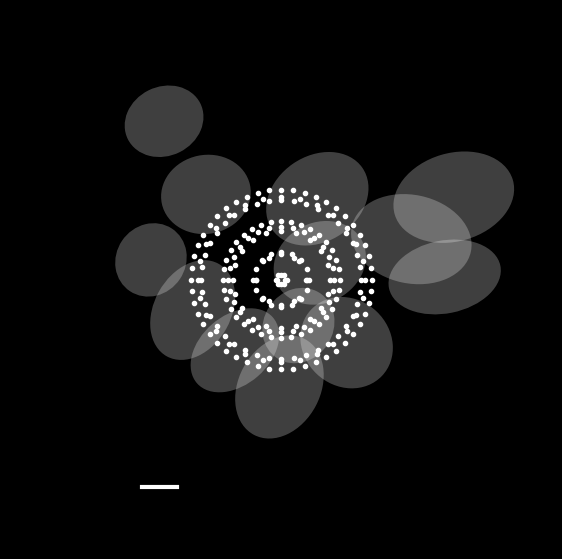

In [ ]:
pix_size=2.6 #um
pix_per_check=15
nb_checks=50
extent = pix_size * pix_per_check * nb_checks

ci = np.array([321,453,526,585,607,637,652,684,691,700,715,726,791])

SX,SY = np.meshgrid(np.linspace(-extent/2,extent/2,50),np.linspace(-extent/2,extent/2,50))

# plt.figure(figsize=(25,14))

plt.figure(figsize=(7,7))
plt.xlim(-extent/5, extent/5)
plt.ylim(-extent/5, extent/5)

for i,c in enumerate(ci):
    # plt.subplot(3,5,i+1)

    spatial = STAs[c]['center_analyse']['Spatial']
    # spatial = spatial**2*np.sign(spatial)

    # plt.imshow(spatial, extent = [-extent/2, extent/2, extent/2, -extent/2])

    r = np.abs(spatial).max()
    e = 250
    _, stats = fit(SX.flatten(),SY.flatten(), spatial.flatten(), bounds=[(-2*r, -e, -e, 50, 50, -np.pi, -r), (2*r, e, e, 150,150, np.pi, r)], maxfev=100000)
    

    ax = plt.gca()
    sc = EllipseCollection(offsets = stats[1:3], widths = 2*stats[3], heights = 2*stats[4], angles=-stats[5]/np.pi*180, units='xy', offset_transform=ax.transData, facecolors='w', edgecolors='None', linewidth=2, alpha=.25)#, facecolors='None', edgecolors=sig)
    ax.add_collection(sc)
    print(stats[3:5]*4)


plt.scatter(X,Y,c='w',marker='.')
plt.axis('off')

plt.plot([-200,-150],[-300, -300], c='w', linewidth=3)


# plt.savefig(r"C:\Users\zfj\Downloads\Fig6A.svg")

[147.46232061  50.        ]
[95.61251979 61.85469308]
[80.57035838 50.0000097 ]
[131.25708602  50.        ]
[127.89568975 149.98111405]
[150.  50.]
[142.7091543   50.00563896]
[149.99999185  50.        ]
[ 50.00000001 150.        ]
[ 50.00007264 149.99995232]
[ 50. 150.]
[ 94.31733234 150.        ]
[ 50. 150.]


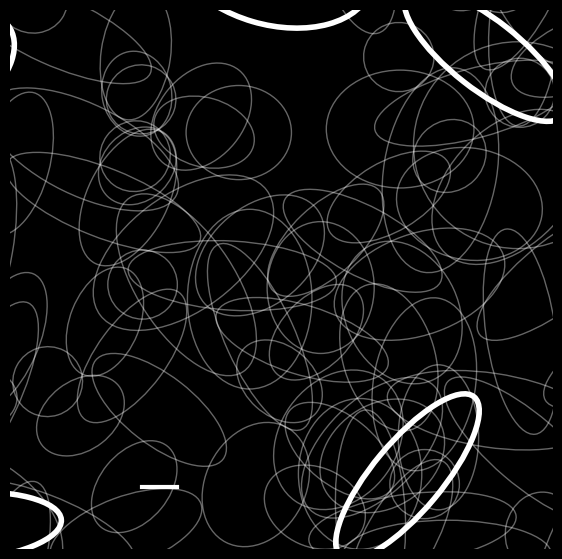

In [6]:
pix_size=2.6 #um
pix_per_check=15
nb_checks=50
extent = pix_size * pix_per_check * nb_checks

ci = np.array([321,453,526,585,607,637,652,684,691,700,715,726,791])

SX,SY = np.meshgrid(np.linspace(-extent/2,extent/2,50),np.linspace(-extent/2,extent/2,50))

# plt.figure(figsize=(25,14))

plt.figure(figsize=(7,7))
plt.xlim(-extent/5, extent/5)
plt.ylim(-extent/5, extent/5)

ax = plt.gca()
    
rads = []

for i,c in enumerate(STAs.keys()):

    spatial = STAs[c]['center_analyse']['Spatial']
    r = np.abs(spatial).max()
    if r == 0:
        continue
    e = extent
    bounds = [(-2*r, -e, -e, 50, 50, -np.pi, -r), (2*r, e, e, 150,150, np.pi, r)]
    _, stats = fit(SX.flatten(),SY.flatten(), spatial.flatten(), bounds=bounds, maxfev=500000)
    # print(stats)
    rads.append([stats[3], stats[4]])
    
    if c in ci:
        print(stats[3:5])
        # sc = EllipseCollection(offsets = stats[1:3], widths = 2*stats[3], heights = 2*stats[4], angles=-stats[5]/np.pi*180, units='xy', offset_transform=ax.transData, facecolors='w', edgecolors='w', linewidth=2, alpha=.05)#, facecolors='None', edgecolors=sig)
        sc = EllipseCollection(offsets = stats[1:3], widths = 2*stats[3], heights = 2*stats[4], angles=-stats[5]/np.pi*180, units='xy', offset_transform=ax.transData, facecolors='none', edgecolors='w', linewidth=4, alpha=1.0)#, facecolors='None', edgecolors=sig)
        ax.add_collection(sc)
    else:
        # plt.scatter(stats[1], stats[2], c='w', marker='.')
        # sc = EllipseCollection(offsets = stats[1:3], widths = 2*stats[3], heights = 2*stats[4], angles=-stats[5]/np.pi*180, units='xy', offset_transform=ax.transData, facecolors='w', edgecolors='None', linewidth=2, alpha=.05)#, facecolors='None', edgecolors=sig)
        sc = EllipseCollection(offsets = stats[1:3], widths = 2*stats[3], heights = 2*stats[4], angles=-stats[5]/np.pi*180, units='xy', offset_transform=ax.transData, facecolors='none', edgecolors='w', linewidth=1, alpha=.4)#, facecolors='None', edgecolors=sig)
        ax.add_collection(sc)
    


# plt.scatter(X,Y,c='w',marker='.')
plt.axis('off')

plt.plot([-200,-150],[-300, -300], c='w', linewidth=3)

In [486]:
pix_size=2.6 #um
pix_per_check=15
nb_checks=50
extent = pix_size * pix_per_check * nb_checks

ci = np.array([321,453,526,585,607,637,652,684,691,700,715,726,791])

SX,SY = np.meshgrid(np.linspace(-extent/2,extent/2,50),np.linspace(-extent/2,extent/2,50))


plt.figure(figsize=(7,7))
plt.xlim(-extent/4, extent/4 - 50)
plt.ylim(-extent/4, extent/4 - 50)

ax = plt.gca()
    
rads = []
r2 = []

RFs = []
# RFs.append([np.nan for _ in range(7)])
# #     else:
# #         _, stats = fit(SX.flatten(),SY.flatten(), spatial.flatten(), bounds=[(-2*r, -e, -e, 50, 50, -np.pi, -r), (2*r, e, e, 150,150, np.pi, r)], maxfev=100000)
# #         RFs.append([c, *stats])

colors = [[c[0]/255, c[1]/255, c[2]/255, 1] for c in (green, red, blue, magenta)]


sel = np.array([637, 652, 691,715])

from scipy.ndimage.filters import gaussian_filter


for i,c in enumerate(STAs.keys()):

    spatial = STAs[c]['center_analyse']['Spatial']
    r = np.abs(spatial).max()
    if r == 0:
        RFs.append([c, *[np.nan for _ in range(7)]])
        continue
    e = extent
    bounds = [(0, -e, -e, 5, 5, -np.pi, -r), (2*r, e, e, e/4, e/4, np.pi, r)]
    pred, stats = fit(SX.flatten(),SY.flatten(), np.abs(gaussian_filter(spatial, sigma=1)).flatten(), bounds=bounds, maxfev=500000)

    if pred.std() == 0:
        RFs.append([c, *[np.nan for _ in range(7)]])
        continue

    bounds = [(-2*r, -e, -e, 5, 5, -np.pi, -r), (2*r, e, e, e/4, e/4, np.pi, r)]
    stats[0] = stats[0] * np.sign(np.corrcoef(spatial.flatten(), pred)[0,1])
    pred, stats = fit(SX.flatten(),SY.flatten(), spatial.flatten(), bounds=bounds, p0 = stats, maxfev=50000)
    RFs.append([c, *stats])
    
    r2 = (1 - (pred.reshape(SX.shape) - spatial).std() / spatial.std())
    if r2 > .007:
        
        rads.append([stats[3], stats[4]])
        # print(r2,[stats[3], stats[4]])
        if c in ci:
            if c in sel:
                sc = EllipseCollection(offsets = stats[1:3], widths = 2*stats[3], heights = 2*stats[4], angles=-stats[5]/np.pi*180, units='xy', offset_transform=ax.transData, facecolors='none', edgecolors='k', linewidth=5, alpha=1.0, zorder=99)#, facecolors='None', edgecolors=sig)
                ax.add_collection(sc)            

                sc = EllipseCollection(offsets = stats[1:3], widths = 2*stats[3], heights = 2*stats[4], angles=-stats[5]/np.pi*180, units='xy', offset_transform=ax.transData, facecolors='none', edgecolors=colors[np.argwhere(c == sel)[0][0]], linewidth=4, alpha=1.0, zorder=100)#, facecolors='None', edgecolors=sig)
                ax.add_collection(sc)
            else:
                sc = EllipseCollection(offsets = stats[1:3], widths = 2*stats[3], heights = 2*stats[4], angles=-stats[5]/np.pi*180, units='xy', offset_transform=ax.transData, facecolors='none', edgecolors='k', linewidth=5, alpha=1.0, zorder=97)#, facecolors='None', edgecolors=sig)
                ax.add_collection(sc)
            
                sc = EllipseCollection(offsets = stats[1:3], widths = 2*stats[3], heights = 2*stats[4], angles=-stats[5]/np.pi*180, units='xy', offset_transform=ax.transData, facecolors='none', edgecolors='w', linewidth=4, alpha=1.0, zorder=98)#, facecolors='None', edgecolors=sig)
                ax.add_collection(sc)
            # print(np.sqrt(stats[3]**2 + stats[4]**2), stats[3], stats[4])

        else:
            sc = EllipseCollection(offsets = stats[1:3], widths = 2*stats[3], heights = 2*stats[4], angles=-stats[5]/np.pi*180, units='xy', offset_transform=ax.transData, facecolors='none', edgecolors='w', linewidth=2, alpha=.4)#, facecolors='None', edgecolors=sig)
            ax.add_collection(sc)
        

# plt.scatter(X,Y, s=240, c='#0052e2aa',marker='.', edgecolor='k', linewidth=1)
plt.scatter(X,Y, s=120, c='k',marker='.', edgecolor='none', linewidth=1, zorder = 101)
plt.scatter(X,Y, s=120, c='#0052e2aa',marker='.', edgecolor='none', linewidth=1, zorder = 102)
plt.axis('off')

plt.plot([-300,-250],[-425, -425], c='w', linewidth=3)


plt.savefig(r"C:\Users\zfj\Downloads\Fig6A.svg", transparent=True)

C:\Users\zfj\AppData\Local\Temp\ipykernel_8952\3739636955.py:31: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


In [471]:
colors[np.argwhere(sel == c)[0][0]]

[0.0, 0.6196078431372549, 0.45098039215686275, 1]

In [ ]:
all_rads = [np.sqrt(x**2 + y**2) for x,y in rads]
plt.hist(all_rads)
np.mean(all_rads)

np.mean([74.67777863994655,97.23741049944154,73.4121480919259,72.75471311049684,97.72817228317858,86.95461444655199,86.34182896264153,94.52515895392378,108.46835702780604,93.7712745711298,89.80438993148758,96.82635608817961,109.12145590975695,])

90.89412757818974

array([ 4.47078702e-01,  1.61961641e+03, -6.37962860e+02,  1.22165386e+02,
        9.47776595e+00, -1.56156168e+00,  5.60667596e-02])

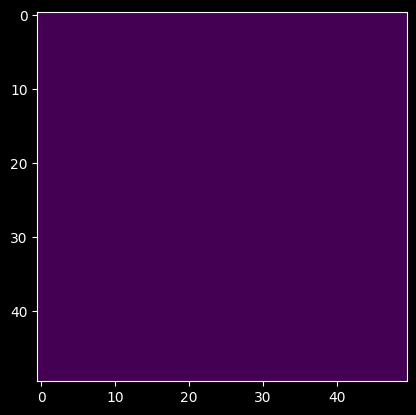

In [ ]:
bounds, stats
# np.sign(np.corrcoef(spatial.flatten(), pred)[0,1])
plt.imshow(pred.reshape(spatial.shape))
stats
# pred.std()

C:\Users\zfj\AppData\Local\Temp\ipykernel_5500\3835946609.py:21: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


[0.5679979997824741, 179.0816326530612, -258.6734693877552, 487.5, 487.5, 0, 4.5158132888332286e-05]
[0.4296731324053359, 59.69387755102025, -59.69387755102048, 487.5, 487.5, 0, 4.059122585933772e-05]
[0.9185221265755892, -99.48979591836746, -975.0, 487.5, 487.5, 0, 9.288645768873449e-05]
[0.35065190845718164, -139.28571428571433, -218.8775510204082, 487.5, 487.5, 0, 2.229954191158151e-05]
[0.4793286747065961, 59.69387755102025, 59.69387755102025, 487.5, 487.5, 0, 0.0001147408363931391]
[0.5633055741732336, 59.69387755102025, 59.69387755102025, 487.5, 487.5, 0, 3.290748111114267e-05]
[0.7328914051491072, -179.08163265306132, -139.28571428571433, 487.5, 487.5, 0, 3.885169377671957e-05]
[0.4348389182835608, -59.69387755102048, 179.0816326530612, 487.5, 487.5, 0, 1.6087345925175356e-05]
[0.567238797549369, -218.8775510204082, 99.48979591836724, 487.5, 487.5, 0, 6.546842217355388e-06]
[0.5667872617323515, -99.48979591836746, 99.48979591836724, 487.5, 487.5, 0, 3.8160383555497016e-05]
[0.52

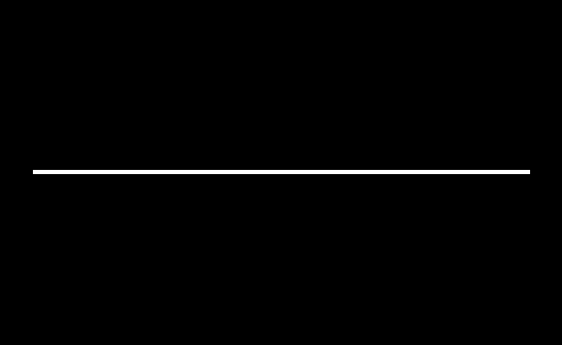

In [ ]:
pix_size=2.6 #um
pix_per_check=15
nb_checks=50
extent = pix_size * pix_per_check * nb_checks

ci = np.array([321,453,526,585,607,637,652,684,691,700,715,726,791])

SX,SY = np.meshgrid(np.linspace(-extent/2,extent/2,50),np.linspace(-extent/2,extent/2,50))

# plt.figure(figsize=(25,14))

plt.figure(figsize=(7,7))
plt.xlim(-extent/5, extent/5)
plt.ylim(-extent/5, extent/5)

ax = plt.gca()
    
rads = []
r2 = []

from scipy.ndimage.filters import gaussian_filter


for i,c in enumerate(STAs.keys()):

    spatial = STAs[c]['center_analyse']['Spatial']
    # spatial =  
    
    plt.imshow(spatial, extent = [-extent/2, extent/2, extent/2, -extent/2])
    r = np.abs(spatial).max()
    if r == 0:
        continue
    e = extent
    # bounds = [(-2*r, -e, -e, 5, 5, -np.pi, -r), (2*r, e, e, e/4, e/4, np.pi, r)]
    bounds = [(0, -e, -e, 5, 5, -np.pi, -r), (2*r, e, e, e/4, e/4, np.pi, r)]
    pred, stats = fit(SX.flatten(),SY.flatten(), np.abs(gaussian_filter(spatial, sigma=1)).flatten(), bounds=bounds, maxfev=500000)

    if pred.std() == 0:
        continue

    bounds = [(-2*r, -e, -e, 5, 5, -np.pi, -r), (2*r, e, e, e/4, e/4, np.pi, r)]
    stats[0] = stats[0] * np.sign(np.corrcoef(spatial.flatten(), pred)[0,1])
    pred, stats = fit(SX.flatten(),SY.flatten(), spatial.flatten(), bounds=bounds, p0 = stats, maxfev=50000)
    
    rads.append([stats[3], stats[4]])
    
    sc = EllipseCollection(offsets = stats[1:3], widths = 2*stats[3], heights = 2*stats[4], angles=-stats[5]/np.pi*180, units='xy', offset_transform=ax.transData, facecolors='none', edgecolors='w', linewidth=4, alpha=1.0)#, facecolors='None', edgecolors=sig)
    ax.add_collection(sc)
    
    
    plt.title(f"$R^2 = {1 - (pred.reshape(SX.shape) - spatial).std() / spatial.std()}$")

    r2.append(1 - (pred.reshape(SX.shape) - spatial).std() / spatial.std())

    plt.savefig(r"C:\Users\zfj\data\marre_lab\test_stas" + f"\{c}.png")
    plt.cla()

# plt.scatter(X,Y,c='w',marker='.')
plt.axis('off')

plt.plot([-200,-150],[-300, -300], c='w', linewidth=3)

In [ ]:
STAs[1]['center_analyse']['EllipseCoor']


# ellipse_params_to_mat(5.87792319e+01,8.27460141e+01,6.38575510e+01,5.14403464e+01,3.09176880e+00)

# a, cx, cy, sx, sy, th, off

# cx, cy, sx, sy

# [4.86018824e-01 5.87792319e+01 8.27460141e+01 6.38575510e+01
#  5.14403464e+01 3.09176880e+00 5.26409869e-02]

# [ 5.29552972e-01  1.42740156e+02 -2.54555454e+02  7.57004896e+01
#   9.57049337e+01 -2.29780903e+00  3.64406257e-02]

array([6.73900681e-01, 2.87452689e+01, 1.85111570e+01, 2.22020145e+00,
       2.07294832e+00, 3.87868675e-45])

[0.5679979997824741, 179.0816326530612, -258.6734693877552, 487.5, 487.5, 0, 4.5158132888332286e-05]
(2500,)


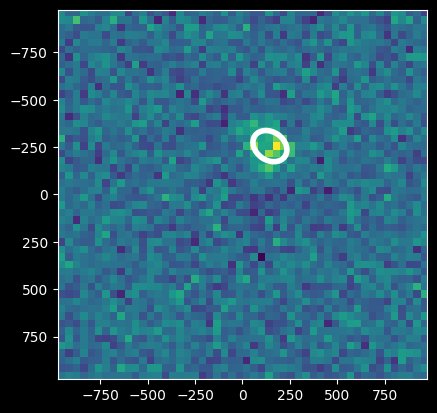

0.05291211426266906

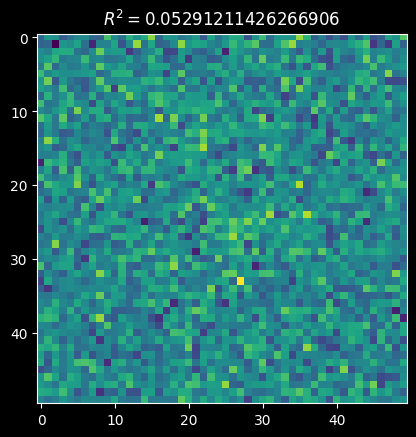

In [ ]:
c = 1
spatial = STAs[c]['center_analyse']['Spatial']


plt.imshow(spatial,  extent = [-extent/2, extent/2, extent/2, -extent/2])

plt.show()

# plt.imshow(gaussian_filter((tmp**2*np.sign(tmp)), sigma=2))
plt.imshow(np.abs(gaussian_filter(spatial, sigma=1)),  extent = [-extent/2, extent/2, extent/2, -extent/2])

    # spatial =  

plt.imshow(spatial, extent = [-extent/2, extent/2, extent/2, -extent/2])
r = np.abs(spatial).max()

e = extent
# bounds = [(-2*r, -e, -e, 5, 5, -np.pi, -r), (2*r, e, e, e/4, e/4, np.pi, r)]
bounds = [(0, -e, -e, 5, 5, -np.pi, -r), (2*r, e, e, e/4, e/4, np.pi, r)]

pred, stats = fit(SX.flatten(),SY.flatten(), np.abs(gaussian_filter(spatial, sigma=1)).flatten(), bounds=bounds, maxfev=500000)

bounds = [(-2*r, -e, -e, 5, 5, -np.pi, -r), (2*r, e, e, e/4, e/4, np.pi, r)]
pred, stats = fit(SX.flatten(),SY.flatten(), np.sign(np.corrcoef(spatial.flatten(), pred)[0,1]) * spatial.flatten(), bounds=bounds, p0 = stats, maxfev=50000)

ax = plt.gca()
sc = EllipseCollection(offsets = stats[1:3], widths = 2*stats[3], heights = 2*stats[4], angles=-stats[5]/np.pi*180, units='xy', offset_transform=ax.transData, facecolors='none', edgecolors='w', linewidth=4, alpha=1.0)#, facecolors='None', edgecolors=sig)
ax.add_collection(sc)

# print(stats)
# 
print(pred.shape)
plt.show()
plt.imshow(pred.reshape(SX.shape) - spatial)
plt.title(f"$R^2 = {1 - (pred.reshape(SX.shape) - spatial).std() / spatial.std()}$")

1 - (pred.reshape(SX.shape) - spatial).std() / spatial.std()


1.0

(array([ 71., 123.,   5.,   2.,   1.,   2.,   4.,   0.,   0.,  11.]),
 array([  9.47776595,  57.27998936, 105.08221276, 152.88443617,
        200.68665957, 248.48888298, 296.29110638, 344.09332979,
        391.89555319, 439.6977766 , 487.5       ]),
 <BarContainer object of 10 artists>)

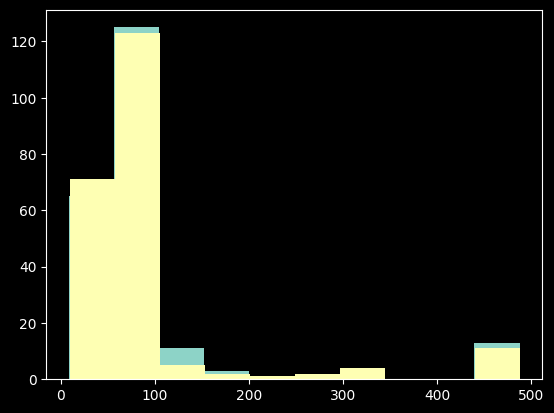

In [ ]:
plt.hist(np.asarray(rads)[:,0])
plt.hist(np.asarray(rads)[:,1])

# np.asarray(rads).shape

In [500]:
clui = np.asarray([d[ci][0]['cluster'] if type(d[ci][0]['cluster']) is np.int64 else 0 for ci in d.keys()])
np.unique(clui)

kl = np.array(list(d.keys()))
for i in range(1, clui.max()):
    print(i, ','.join([str(j) for j in kl[clui == i]]))
    # print(i, ','.join([str(j) for j in np.argwhere(clui == i)[:,0]]))





1 482,664,793,892
2 301,420
3 321,453,526,585,607,637,652,684,691,700,715,726,791
4 361,739,755,841
5 62,343,448,828,861,866,920,948,1005
6 37,416,504
7 222,252,305,336,367,514,704,749,777,938
8 344,387,737,846
9 178,296,595,762
10 302,623,826
11 979,1007
12 570,601,613,625,882
13 388,1018,1036,1051
14 675,796
15 687,697,752
16 245,338,438,486,881
17 422
18 424,582,617,693,712,727
19 289
20 373
21 1
22 987
23 369,554
24 263,430,820
25 115
26 683
27 380
28 92,848
29 66,412
30 300,635,815
31 18


In [501]:
mn, mx = np.infty, -np.infty

for i,ci in enumerate(d.keys()):
    for j in range(len(d[ci])):
        for k, st in enumerate(d[ci][j]['spike_trains']):
            if len(st):
                if st.min() < mn:
                    mn = st.min()
                if st.max() > mx:
                    mx = st.max()
print(mn, mx)
print(len(list(d.keys())))

-0.125 0.8500000000003638
214


In [502]:

ncells = len(list(d.keys()))
nt = 5
ti = np.linspace(mn,mx,nt+1)

nreps = 30
ntrials = nreps * len(X) #30 repeats * 240 locations = 7200 trials!
psth = np.empty((ntrials, ncells, nt)) * np.nan


for i,ci in enumerate(d.keys()):
    for j in range(len(d[ci])):
        for k, st in enumerate(d[ci][j]['spike_trains']):
            for t in range(nt):
                psth[k+nreps*j, i, t] = np.count_nonzero(np.logical_and(st>=ti[t], st<ti[t+1]))    

In [ ]:
_,axs = plt.subplots(np.ceil(ncells/6).astype(int),6,figsize=(25,4*np.ceil(ncells/6).astype(int)))
axs = axs.flatten()
for j in range(ncells):
    plt.sca(axs[j])
    
    fr = psth[:,j].reshape((len(X), nreps, nt)).mean(axis=1) / np.diff(ti)[None, :]

    plt.scatter(X,Y, s=100, c=fr[:,1:].mean(axis=-1) - fr[:,0])

    _, stats = fit(X,Y, fr[:,1:].mean(axis=-1) - fr[:,0], bounds = ((-20,-300,-300, 10, 10, -np.pi, -10), (20, 300, 300, 300, 300, np.pi, 10)))

    ax = plt.gca()
    sc = EllipseCollection(offsets = stats[1:3], widths = 2*stats[3], heights = 2*stats[4], angles=-stats[5]/np.pi*180, units='xy', offset_transform=ax.transData, facecolors='None', edgecolors='w', linewidth=2)#, facecolors='None', edgecolors=sig)
    ax.add_collection(sc)

    plt.colorbar()

KeyboardInterrupt: 

[ 1.33441262e+00 -2.50119889e+02 -4.97477764e+01  3.37696984e-01
  3.37696984e-01  0.00000000e+00  1.28205128e-02]


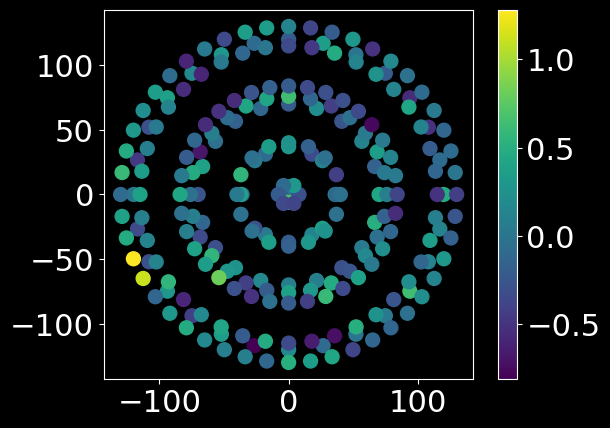

In [ ]:
j = -30
fr = psth[:,j].reshape((len(X), nreps, nt)).mean(axis=1) / np.diff(ti)[None, :]
# plt.hist(fr[:,1:].mean(axis=-1) - fr[:,0])
# (fr[:,1:].mean(axis=-1) - fr[:,0]).std()

# fig, axs = plt.subplots(1,2,figsize=(15,7))
# ax = axs[0]
# plt.sca(ax)

plt.figure()
ax = plt.gca()


f, stats = fit(X,Y, fr[:,1:].mean(axis=-1) - fr[:,0], bounds = ((-20,-300,-300, 0, 0, -np.pi, -10), (20, 300, 300, 300, 300, np.pi, 10)))


# sc = EllipseCollection(offsets = (0,0), widths = 1, heights = 1, angles=0, units='xy', offset_transform=ax.transData, facecolors='None', edgecolors='w')#, facecolors='None', edgecolors=sig)
# sc.set_array(sig[:,0])


plt.scatter(X, Y, s=100, c = fr[:,1:].mean(axis=-1) - fr[:,0])
plt.axis('square')

# plt.xlim(-1,1)
# plt.ylim(-4500,1000)


plt.colorbar()

sc = EllipseCollection(offsets = stats[1:3], widths = 2*stats[3], heights = 2*stats[4], angles=-stats[5]/np.pi*180, units='xy', offset_transform=ax.transData, facecolors='None', edgecolors='w', linewidth=2)#, facecolors='None', edgecolors=sig)
ax.add_collection(sc)
sc = EllipseCollection(offsets = stats[1:3], widths = stats[3], heights = stats[4], angles=-stats[5]/np.pi*180, units='xy', offset_transform=ax.transData, facecolors='None', edgecolors='w', linewidth=2)#, facecolors='None', edgecolors=sig)
ax.add_collection(sc)


qX,qY = np.meshgrid(np.linspace(-150,150,301), np.linspace(-150,150,301))
qZ = gauss2((qX.flatten(), qY.flatten()), *stats)

# axs[1].imshow(qZ.reshape(qX.shape), extent=(-150, 150, -150, 150))
# axs[1].contour(qX,qY,qZ.reshape(qX.shape))
# plt.contour(qX,qY,qZ.reshape(qX.shape),colors='w')


print(stats) #amplitude, xo, yo, sigma_x, sigma_y, theta, offset



In [ ]:
stats = np.zeros((ncells, 7))
for j in range(ncells):
    fr = psth[:,j].reshape((len(X), nreps, nt)).mean(axis=1) / np.diff(ti)[None, :]
    _, stats[j] = fit(X,Y, fr[:,1:].mean(axis=-1) - fr[:,0], bounds = ((-20,-300,-300, 10, 10, -np.pi, -10), (20, 300, 300, 300, 300, np.pi, 10)))

plt.figure()
ax = plt.gca()

sc = EllipseCollection(offsets = stats[:,1:3], widths = 2*stats[:,3], heights = 2*stats[:,4], angles=-stats[:,5]/np.pi*180, units='xy', offset_transform=ax.transData, facecolors='None', edgecolors='w', linewidth=2)#, facecolors='None', edgecolors=sig)
ax.add_collection(sc)
plt.xlim(-150,150)
plt.ylim(-150,150)



(-150.0, 150.0)

In [ ]:
# psth = psth[:,[54,86,98,104,108,115,117,123,125,129,133,136,148],:]
psth.shape

(7200, 13, 5)

In [10]:
def train_test_split(psth, X, Y):

    ui = np.tile(np.arange(len(X))[:,None],(1,nreps)).flatten()
    cv = KFold(10, shuffle=True, random_state=0)
    train, test = list(cv.split(psth, ui))[0]

    # u = np.stack((X[ui],Y[ui[train]]), axis=1)
    u = np.stack((X,Y), axis=0)

    xtrain, xtest = psth[train], psth[test]
    ytrain, ytest = np.stack((X[ui[train]],Y[ui[train]]), axis=1), np.stack((X[ui[test]],Y[ui[test]]), axis=1)
    # ltrain, ltest = ui[train], ui[test]

    xtrain = xtrain.reshape((xtrain.shape[0],-1))
    xtest = xtest.reshape((xtest.shape[0],-1))

    return (xtrain, xtest), (ytrain, ytest)

(xtrain, xtest), (ytrain, ytest) = train_test_split(psth, X, Y)


In [12]:
xtrain.shape, xtest.shape, psth.shape, nt, 214*5

((6480, 1070), (720, 1070), (7200, 214, 5), 5, 1070)

In [11]:
def train_network(x,y):
    (xtrain, xtest), (ytrain, ytest) = x,y

    width = 128
    depth = 48

    act = 'selu'
    normalizer = layers.BatchNormalization

    tmi = layers.Input(xtrain.shape[1])
    ffn = layers.Dense(width, activation=act)(tmi)
    tmii = normalizer()(ffn)
    ffn = tmii

    for i in range(depth):
        ffn = layers.Dense(width, activation=act)(ffn)
        ffn = layers.Add()([tmii, ffn])
        ffn = normalizer()(ffn)

    ffn = layers.Dense(2)(ffn)
    mod = keras.Model(inputs=tmi, outputs = ffn)

    # mod.summary()
    mod.compile(
        loss = 'mse',
        
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        metrics=tf.keras.metrics.RootMeanSquaredError()
    )
    history = mod.fit(xtrain, ytrain, validation_data=(xtest,ytest), epochs=200, callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss',restore_best_weights=True, patience=20, verbose=1))

    return mod, history

mod, history = train_network((xtrain, xtest), (ytrain, ytest))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

Epoch 1/200
203/203 [==============================] - 19s 29ms/step - loss: 2860.8430 - root_mean_squared_error: 53.4868 - val_loss: 1418.0980 - val_root_mean_squared_error: 37.6576
Epoch 2/200
203/203 [==============================] - 5s 24ms/step - loss: 1154.6842 - root_mean_squared_error: 33.9806 - val_loss: 646.3380 - val_root_mean_squared_error: 25.4232
Epoch 3/200
203/203 [==============================] - 5s 23ms/step - loss: 632.0388 - root_mean_squared_error: 25.1404 - val_loss: 464.8731 - val_root_mean_squared_error: 21.5609
Epoch 4/200
203/203 [==============================] - 5s 23ms/step - loss: 479.8870 - root_mean_squared_error: 21.9063 - val_loss: 472.1378 - val_root_mean_squared_error: 21.7287
Epoch 5/200
203/203 [==============================] - 5s 23ms/step - loss: 442.3076 - root_mean_squared_error: 21.0311 - val_loss: 522.7014 - val_root_mean_squared_error: 22.8627
Epoch 6/200
203/203 [==============================] - 6s 28ms/step - loss: 414.0702 - root_mean

In [12]:
ptest = mod.predict(xtest)

C:\Users\zfj\AppData\Local\Temp\ipykernel_23372\903022753.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('inferno')
C:\Users\zfj\AppData\Local\Temp\ipykernel_23372\903022753.py:21: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, pad=.001)


(-161.06399185884715,
 162.16080977689506,
 -148.59325103759767,
 174.63155059814454)

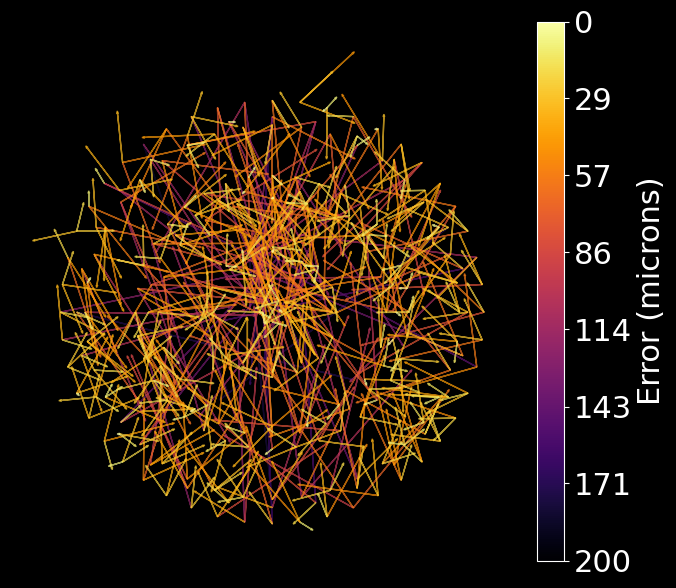

In [ ]:
err = np.sqrt(np.sum((ptest - ytest)**2, axis=1))

clim = [0, 200]

cmap = mpl.cm.get_cmap('inferno')
norm = mpl.colors.Normalize(vmin=-clim[1], vmax=-clim[0])

plt.figure(figsize=(8,7))

ii = np.flip(np.argsort(err))

for k in range(len(ytest)):
    i = ii[k]
    # plt.quiver(ytest[:,0,0], ytest[:,0,1], 300*(ptest[:,0,0] - ytest[:,0,0]), 300*(ptest[:,0,1] - ytest[:,0,1]), angles='xy')
    plt.arrow(ytest[i,0], ytest[i,1], ptest[i,0] - ytest[i,0], ptest[i,1] - ytest[i,1], color=cmap(norm(-err[i])), length_includes_head=True, head_width=1, alpha=.7)
# ytest.squeeze().shape, ptest.shape


sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)

cbar = plt.colorbar(sm, pad=.001)
cbar.set_label('Error (microns)')
cbar.ax.set_yticks(np.linspace(-clim[1],-clim[0],8))
cbar.ax.set_yticklabels([f"{abs(i):0.0f}" for i in np.linspace(-clim[1],-clim[0],8)])

plt.axis('square')
plt.axis('off')

In [ ]:
err_b = np.empty(1000)
for k in range(1000):
    err_b[k]= np.sqrt(np.sum((np.random.permutation(ptest)[:,:] - ytest[:,:])**2, axis=1)).mean()

plt.hist(err, density=True, color='#4E2A84',edgecolor='w')
plt.axvline(np.percentile(err_b,.05),0,1,color='w',linestyle='--')
plt.xlabel('Error (microns)')
plt.ylabel('Frequency')
print(err.mean())

44.69132186643717


In [377]:
def get_thresh(y,p, do_plotting = False, c='w'):
    from scipy.optimize import curve_fit
    def logifunc(x,k):
        return 1. / (1 + np.exp(-k*x))


    N = len(y)

    i = np.triu_indices(N, 1)
    vyx = (y[:,None,0] - y[None,:,0])[i]
    vpx = (p[:,None,0] - p[None,:,0])[i]    
    vyy = (y[:,None,1] - y[None,:,1])[i]
    vpy = (p[:,None,1] - p[None,:,1])[i]

    d = np.sqrt(vyx**2 + vyy**2)
    b = ((vyx * vpx) + (vyy * vpy)) > 0

    k, _ = curve_fit(logifunc, d, b, p0=0.027)

    if do_plotting:
        di, ji = np.unique(np.round(d*100)/100, return_inverse=True)
        ndists = len(di)

        bsi = np.zeros(ndists)
        bi = np.zeros(ndists)

        for i in range(1,ndists):
            bi[i] = np.nanmean(b[ji==i])
            bsi[i] = np.nanstd(b[ji==i])/np.sqrt(np.count_nonzero(ji==i))

        di[0] = 0
        bi[0] = .5

        # plt.errorbar(di,bi,bsi, linestyle='none', marker='o', capsize=3, capthick=3)
        
        ei = np.linspace(0, d.max(), 100)
        e = logifunc(ei, k.mean()) 
        # plt.plot(ei,e)

        # plt.cla()


        th = np.log(1/3)/-k.mean()    

        plt.plot(ei, e, c=c)
        plt.errorbar(di,bi,bsi, linestyle='none', marker='o', color=c, capsize=3, capthick=3)

        
        xl = plt.xlim()
        yl = plt.ylim()
        
        plt.vlines(th,yl[0],.75,color=c)
        plt.hlines(.75, xl[0], th, color=c)  


        plt.xlim(xl)
        plt.ylim(yl)
        # print(th)

        plt.xlabel('Distance (microns)')
        plt.ylabel('Discrimination accuracy')

        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)


        plt.gca().spines[['top','right']].set_color('none')
        plt.gca().spines['left'].set_bounds([0.5,1.0])
        plt.gca().spines['bottom'].set_bounds([0,280])
        plt.xticks([0, 70, 140, 210, 280])

        plt.yticks([0.5, 0.75, 1.0], labels=['.50', '.75', '1.0'])



    return np.log(1/3)/-k

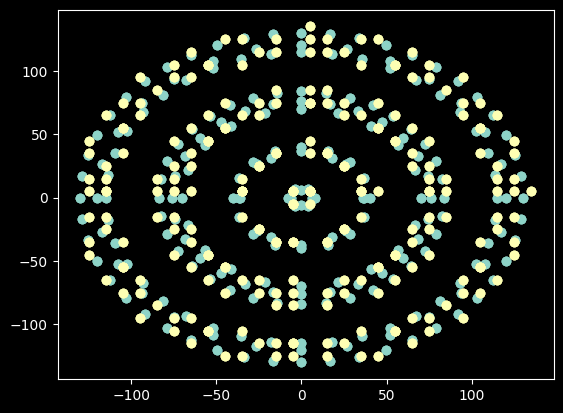

In [41]:
f=10

ystest = (ytest//f + .5)*f
plt.scatter(*ytest.T)
plt.scatter(*ystest.T)
# ytest.shape


[16.63327625]


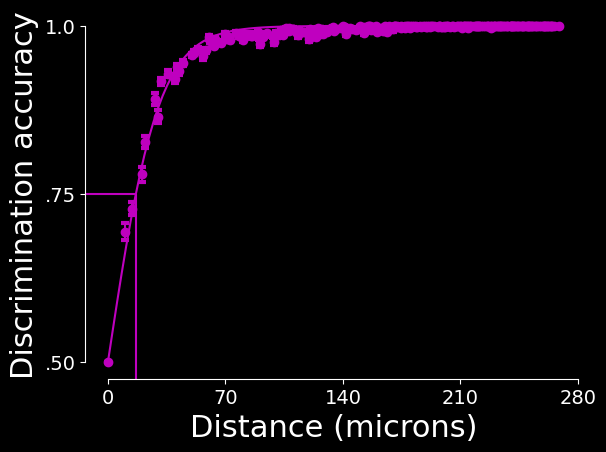

In [65]:
th = get_thresh(ystest, ptest, do_plotting=True, c='m')

# plt.savefig(r"C:\Users\zfj\Downloads\Fig6B3.svg")

print(th)

In [ ]:
# xtest.shape, psth.shape, ltest.shape,nt, 1070//5
# _, ltest = 
ystest.shape

(720, 2)

array([17.29466478])

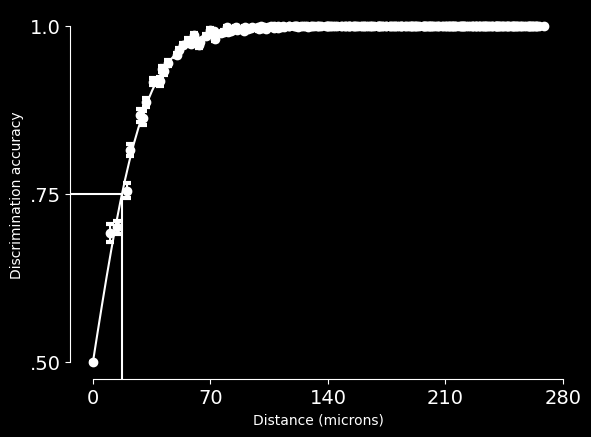

In [34]:
def remove_noise_correlations(xtest, ytest, nt, f=10):
    stest = xtest.copy().reshape((-1,xtest.shape[1]//nt, nt))
    

    _,ltest = np.unique(ytest,axis=0, return_inverse=True)

    for c in range(stest.shape[1]):
        for i in range(ltest.max()):
            stest[ltest == i, c, :] = np.random.permutation(stest[ltest == i, c, :])

    pstest = mod.predict(stest.reshape(xtest.shape))

    return pstest, get_thresh(ytest, pstest, do_plotting=True)


pstest, th_s = remove_noise_correlations(xtest, ystest, nt)
th_s

In [52]:
def get_th_map(ytest, ptest):
    u, ui = np.unique(ytest, axis=0, return_inverse=True)
    
    udist = np.sqrt(((u[:,None,:] - u[None,:,:])**2).sum(axis=-1))

    th_map = np.zeros(u.shape[0])
    # th_s_map = np.zeros(u.shape[1])
    for i,c in enumerate(u):
        j = np.argwhere(udist[i] < 30.1)
        
        k = np.isin(ui, j)

        th_map[i] = get_thresh(ytest[k], ptest[k], do_plotting=False)
        
    th_map[th_map < 0] = np.infty
    return th_map

th_map = get_th_map(ystest, ptest)
th_s_map = get_th_map(ystest, pstest)


In [53]:
th_map.min(), th_s_map.min(), th_map[~np.isinf(th_map)].max()

(7.12409991451789, 9.470130113821298, 37.57262138004641)

C:\Users\zfj\AppData\Local\Temp\ipykernel_8952\1954230348.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('inferno')


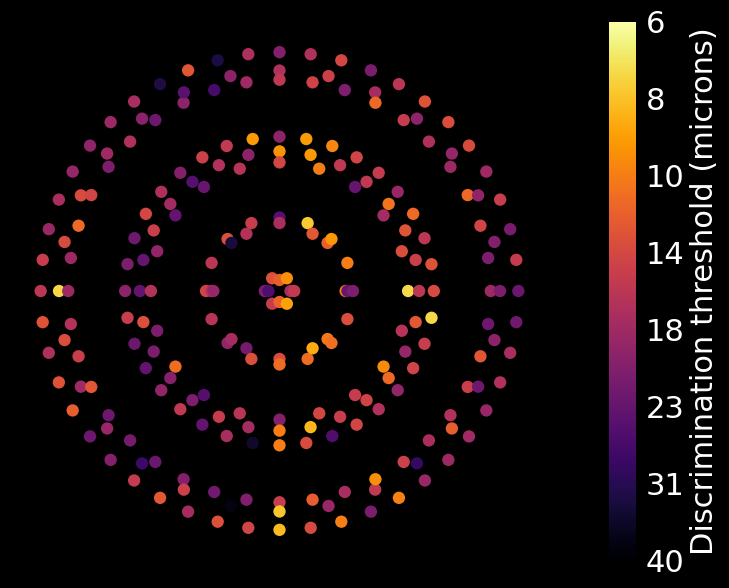

In [506]:
def plot_th_map(ytest, th_map, clim=None):
    u, ui = np.unique(ytest, axis=0, return_inverse=True)
    
    mpl.rcParams.update({'font.size': 22})
    if clim is None:
        clim = [np.log10(th_map.min()), np.log10(th_map[~np.isinf(th_map)].max())]
    else:
        clim = [np.log10(clim[0]), np.log10(clim[1])]
    cmap = mpl.cm.get_cmap('inferno')
    plt.figure(figsize=(10,7))
    patches = [plt.Circle((cxy[0],-cxy[1]),(u.max()-u.min())/np.sqrt(u.shape[0])/5) for cxy in u]
    coll = matplotlib.collections.PatchCollection(patches, cmap=cmap)
    coll.set_array(-np.log10(th_map))
    plt.gca().add_collection(coll)
    sm = coll
    coll.set_clim(-clim[1], -clim[0])
    cbar = plt.colorbar(sm, pad=.001)
    cbar.set_label('Discrimination threshold (microns)')
    cbar.ax.set_yticks(np.linspace(-clim[1],-clim[0],8))
    cbar.ax.set_yticklabels([f"{10**abs(i):0.0f}" for i in np.linspace(-clim[1],-clim[0],8)])
    cbar.ax.tick_params(color='none')#, direction='in', pad=-10)#, horizontalalignment='left')
    cbar.outline.set_edgecolor('none')
    plt.axis('square')
    plt.axis('off')

plot_th_map(ytest, th_map, clim=(6,40))
# print(th_map.min(), th_map[~np.isinf(th_map)].max())

plt.savefig(r"C:\Users\zfj\Downloads\Fig6B_all.svg", transparent=True)

In [ ]:
psth.shape

(7200, 214, 5)

In [ ]:
xtrain.reshape((-1,*psth.shape[1:]))[:, [54,86,98,104,108,115,117,123,125,129,133,136,148]]

(6480, 214, 5)

In [ ]:
xtest.shape, stest.shape

((720, 65), (720, 13, 5))

In [ ]:
# ystest.shape, xtest.shape, nt, 65//5
stest = xtest.copy().reshape((-1,xtest.shape[1]//nt, nt))
    
_,ltest = np.unique(ytest,axis=0, return_inverse=True)

for c in range(stest.shape[1]):
    for i in range(ltest.max()):
        stest[ltest == i, c, :] = np.random.permutation(stest[ltest == i, c, :])

pstest = mod.predict(stest.reshape(xtest.shape))


In [68]:
y_all, p_all = ystest, ptest

Epoch 1/200
203/203 [==============================] - 19s 36ms/step - loss: 3381.5020 - root_mean_squared_error: 58.1507 - val_loss: 2298.7913 - val_root_mean_squared_error: 47.9457
Epoch 2/200
203/203 [==============================] - 6s 31ms/step - loss: 2226.0161 - root_mean_squared_error: 47.1807 - val_loss: 1902.6161 - val_root_mean_squared_error: 43.6190
Epoch 3/200
203/203 [==============================] - 4s 19ms/step - loss: 1868.3119 - root_mean_squared_error: 43.2240 - val_loss: 1801.4244 - val_root_mean_squared_error: 42.4432
Epoch 4/200
203/203 [==============================] - 5s 23ms/step - loss: 1764.7290 - root_mean_squared_error: 42.0087 - val_loss: 1665.6993 - val_root_mean_squared_error: 40.8130
Epoch 5/200
203/203 [==============================] - 6s 27ms/step - loss: 1728.3713 - root_mean_squared_error: 41.5737 - val_loss: 1547.2838 - val_root_mean_squared_error: 39.3355
Epoch 6/200
203/203 [==============================] - 5s 27ms/step - loss: 1646.1987 - r

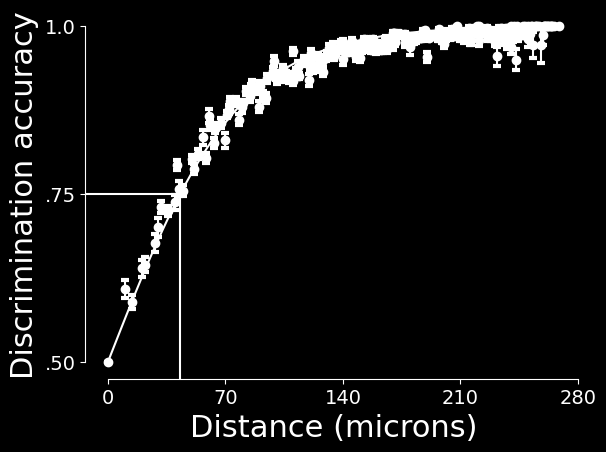

[50.97916681]


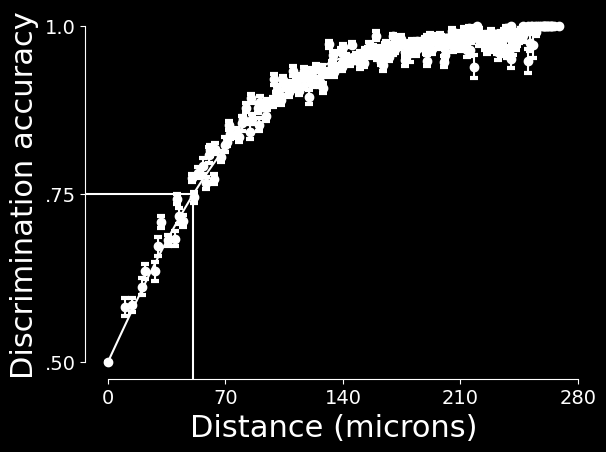

C:\Users\zfj\AppData\Local\Temp\ipykernel_8952\796619201.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('inferno')


In [503]:
# the OFF tr alphas
# 54,86,98,104,108,115,117,123,125,129,133,136,148
(xtrain, xtest), (ytrain, ytest) = train_test_split(psth[:,[54,86,98,104,108,115,117,123,125,129,133,136,148],:], X, Y)

mod, _ = train_network((xtrain, xtest), (ytrain, ytest))

u = np.unique(ytest, axis=0)

ptest = mod.predict(xtest)

f=10
ystest = (ytest//f + .5)*f

print(get_thresh(ystest, ptest, do_plotting=True))
plt.show()

pstest, th_s = remove_noise_correlations(xtest, ystest, nt)
print(th_s)
plt.show()

a_th_map = get_th_map(ystest, ptest)
a_th_s_map = get_th_map(ystest, pstest)

plot_th_map(ytest, a_th_map, clim=(6,40))

C:\Users\zfj\AppData\Local\Temp\ipykernel_8952\796619201.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('inferno')


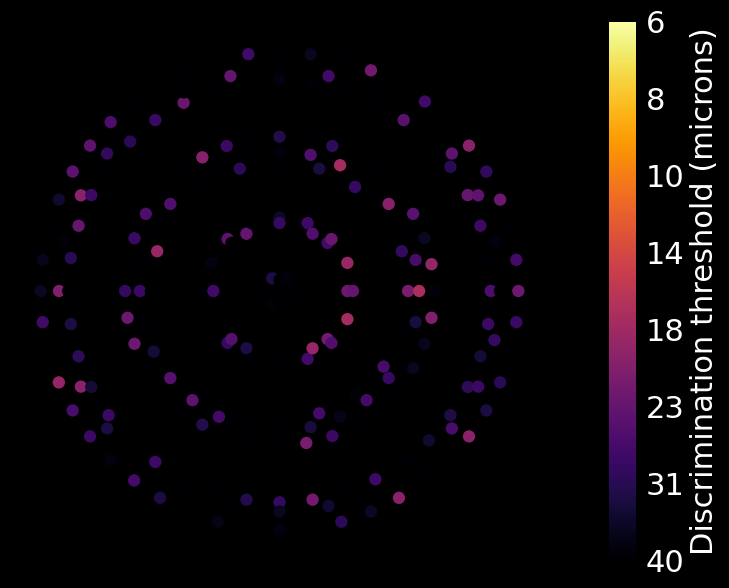

In [505]:
plot_th_map(ytest, a_th_map, clim=(6,40))
plt.savefig(r"C:\Users\zfj\Downloads\Fig6B_offtra.svg", transparent=True)



[42.63516446]
[16.63327625]


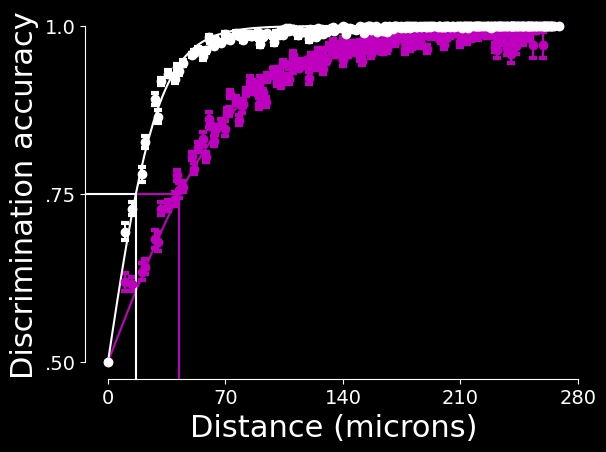

In [75]:
y_off, p_off = ystest, ptest


print(get_thresh(y_off, p_off, do_plotting=True, c='m'))
print(get_thresh(y_all, p_all, do_plotting=True))


Epoch 1/200
203/203 [==============================] - 12s 16ms/step - loss: 3441.7087 - root_mean_squared_error: 58.6661 - val_loss: 2391.9470 - val_root_mean_squared_error: 48.9075
Epoch 2/200
203/203 [==============================] - 3s 13ms/step - loss: 2382.6365 - root_mean_squared_error: 48.8123 - val_loss: 2179.7495 - val_root_mean_squared_error: 46.6878
Epoch 3/200
203/203 [==============================] - 3s 13ms/step - loss: 2138.8787 - root_mean_squared_error: 46.2480 - val_loss: 1979.2175 - val_root_mean_squared_error: 44.4884
Epoch 4/200
203/203 [==============================] - 3s 13ms/step - loss: 2035.9674 - root_mean_squared_error: 45.1217 - val_loss: 2025.9788 - val_root_mean_squared_error: 45.0109
Epoch 5/200
203/203 [==============================] - 3s 13ms/step - loss: 2002.3931 - root_mean_squared_error: 44.7481 - val_loss: 1871.6366 - val_root_mean_squared_error: 43.2624
Epoch 6/200
203/203 [==============================] - 3s 13ms/step - loss: 1976.9094 - r

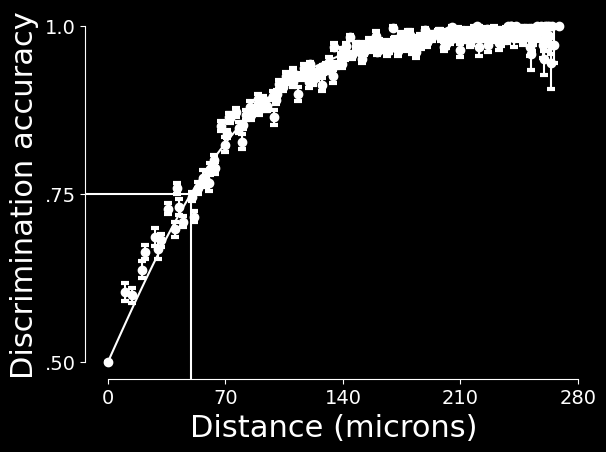

[54.34489572]


C:\Users\zfj\AppData\Local\Temp\ipykernel_23372\1110181308.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('inferno')


In [ ]:
#random subset
(xtrain, xtest), (ytrain, ytest) = train_test_split(psth[:,np.random.choice(psth.shape[1], 13),:], X, Y)

mod, _ = train_network((xtrain, xtest), (ytrain, ytest))

u = np.unique(ytest, axis=0)

ptest = mod.predict(xtest)

# ystest = (ytest//f + .5)*f
print(get_thresh(ystest, ptest, do_plotting=True))
plt.show()

pstest, th_s = remove_noise_correlations(xtest, ystest, nt)
print(th_s)
plt.show()

r_th_map = get_th_map(u.T, ytest, ptest)
r_th_s_map = get_th_map(u.T, ytest, pstest)

plot_th_map(u.T, r_th_map)

In [ ]:
# RFs = []


# # 

# e = 250
# for i,c in enumerate(STAs.keys()):
    
#     spatial = STAs[c]['center_analyse']['Spatial']
    
#     r = np.abs(spatial).max()
#     if r == 0:
#         RFs.append([np.nan for _ in range(7)])
#     else:
#         _, stats = fit(SX.flatten(),SY.flatten(), spatial.flatten(), bounds=[(-2*r, -e, -e, 50, 50, -np.pi, -r), (2*r, e, e, 150,150, np.pi, r)], maxfev=100000)
#         RFs.append([c, *stats])

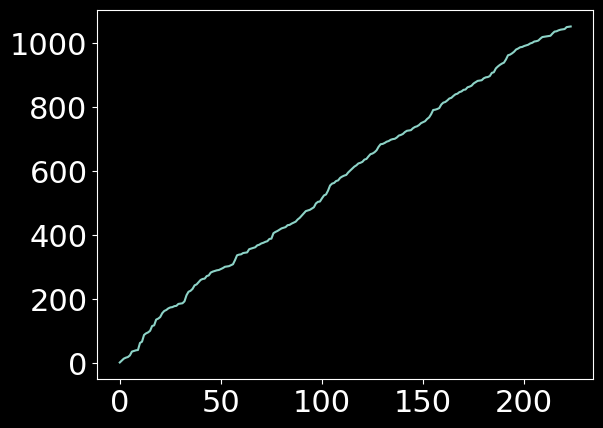

In [84]:
# RFs[0], RFs[8]
plt.plot([rf[0] for rf in RFs])

In [127]:
list(d.keys()) == 321

False

In [133]:
# cell uuids
print(d.keys())
print(STAs.keys())
# 321,453,526,585,607,637,652,684,691,700,715,726,791 <--- off tr a
# [54,86,98,104,108,115,117,123,125,129,133,136,148] <-- index of off tr a in d.keys()
# [57, 89, 102, 111, 115, 122, 124, 130, 132, 136, 140, 143, 156] << -- index of off tr a in STAs.keys()


# [np.argwhere(np.array(list(d.keys())) == i)[0,0] for i in [321,453,526,585,607,637,652,684,691,700,715,726,791]]
# [np.argwhere(np.array(list(STAs.keys())) == i)[0,0] for i in [321,453,526,585,607,637,652,684,691,700,715,726,791]]

[np.argwhere(RFi == i)[0][0] for i in [321,453,526,585,607,637,652,684,691,700,715,726,791]]


dict_keys([1, 7, 13, 16, 18, 37, 40, 62, 66, 87, 92, 95, 100, 115, 117, 135, 138, 143, 155, 162, 165, 170, 173, 174, 177, 178, 184, 185, 186, 192, 211, 222, 225, 231, 242, 245, 252, 259, 262, 263, 271, 273, 282, 285, 287, 289, 290, 293, 296, 300, 301, 302, 305, 308, 321, 336, 338, 339, 343, 344, 345, 355, 357, 359, 361, 367, 369, 373, 375, 378, 380, 387, 388, 405, 409, 412, 416, 420, 422, 424, 430, 431, 435, 438, 441, 448, 453, 460, 467, 474, 478, 482, 486, 498, 503, 504, 514, 523, 526, 538, 554, 570, 578, 582, 585, 587, 595, 601, 607, 613, 617, 623, 625, 628, 635, 637, 645, 652, 654, 658, 664, 675, 683, 684, 687, 691, 693, 697, 699, 700, 704, 710, 712, 715, 721, 725, 726, 727, 733, 737, 739, 749, 752, 755, 762, 767, 777, 790, 791, 793, 796, 813, 815, 820, 826, 828, 834, 839, 841, 846, 848, 853, 854, 861, 863, 866, 873, 877, 881, 882, 883, 892, 893, 896, 906, 908, 920, 926, 931, 935, 938, 948, 961, 963, 967, 972, 979, 982, 986, 987, 990, 992, 994, 998, 1000, 1004, 1005, 1007, 1013, 101

[57, 89, 102, 111, 115, 122, 124, 130, 132, 136, 140, 143, 156]

(214,)
107 601
211 1049
97 523
45 289
13 115
193 998
165 866
63 359
155 828
196 1005
189 987
39 263
121 675


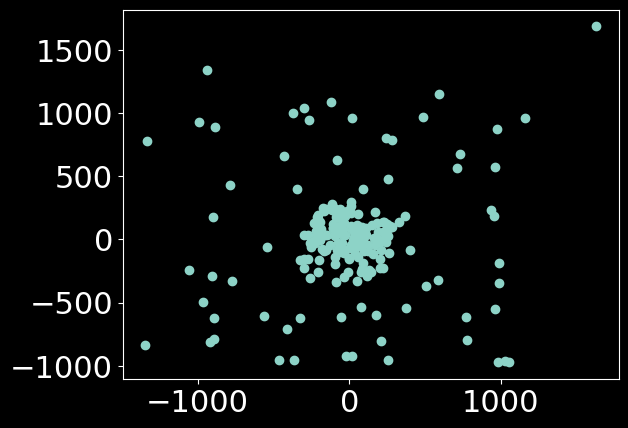

In [156]:
RFx = np.array([rf[2] for rf in RFs])
RFy = np.array([rf[3] for rf in RFs])
RFi = np.array([rf[0] for rf in RFs]) # the uuid for this cell

plt.scatter(RFx, RFy)


kl = np.array(list(d.keys()))
print(kl.shape)
# klS = np.array(list(STAs.keys()))

STA_is = []
matches = []
# OFFai = []

# OFFas = [54,86,98,104,108,115,117,123,125,129,133,136,148]
# OFFas = [54,86,98,104,108,115,117,123,125,129,133,136,148]

OFFas = [321,453,526,585,607,637,652,684,691,700,715,726,791]

for OFFa in OFFas:
    off_i = np.argwhere(RFi == OFFa)[0][0]
    # print(off_i, RFx.shape, RFx[off_i], RFy[off_i])

    
    STA_i = np.argsort((RFx - RFx[off_i])**2 + (RFy - RFy[off_i])**2)
    i = 1
    k = np.argwhere(kl == RFi[STA_i[i]])
    while not len(k):
        i += 1
        k = np.argwhere(kl == RFi[STA_i[i]])
    print(k[0][0], kl[k[0][0]])
    STA_is.append(STA_i[i])

    

    # OFFai.append(np.argwhere(kl == RFi[STA_i[0]])[0][0])
    # OFFai.append(np.argwhere(kl == OFFa)[0][0])
    matches.append(k[0][0])


In [150]:
matches

OFFai = [57, 89, 102, 111, 115, 122, 124, 130, 132, 136, 140, 143, 156] #[54,86,98,104,108,115,117,123,125,129,133,136,148]
 
# OFFai = [np.argwhere(kl == OFFa)[0][0] for OFFa in OFFas]

In [154]:
np.array(list(STAs.keys()))[STA_is]

array([ 601, 1049,  523,  289,  115,  998,  866,  359,  828, 1005,  987,
        263,  675])

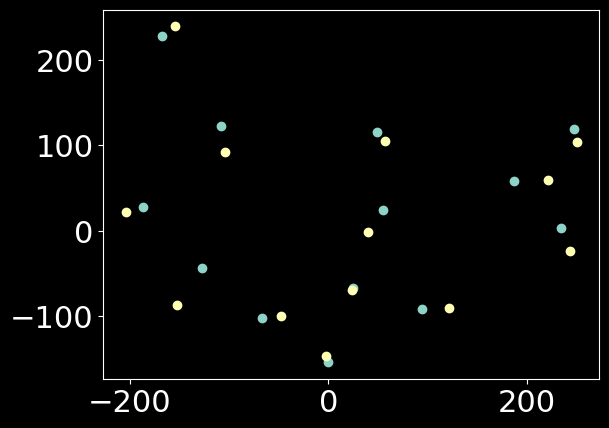

In [152]:
plt.scatter(RFx[OFFai], RFy[OFFai])
plt.scatter(RFx[STA_is], RFy[STA_is])
# print(matches)

In [ ]:
psth.shape, RFx.shape

((7200, 214, 5), (224,))

Epoch 1/200
203/203 [==============================] - 12s 18ms/step - loss: 3627.9683 - root_mean_squared_error: 60.2326 - val_loss: 2758.8008 - val_root_mean_squared_error: 52.5243
Epoch 2/200
203/203 [==============================] - 3s 14ms/step - loss: 2820.1284 - root_mean_squared_error: 53.1049 - val_loss: 2529.2773 - val_root_mean_squared_error: 50.2919
Epoch 3/200
203/203 [==============================] - 3s 14ms/step - loss: 2633.5920 - root_mean_squared_error: 51.3185 - val_loss: 2475.1560 - val_root_mean_squared_error: 49.7509
Epoch 4/200
203/203 [==============================] - 3s 14ms/step - loss: 2591.1584 - root_mean_squared_error: 50.9034 - val_loss: 2450.3049 - val_root_mean_squared_error: 49.5006
Epoch 5/200
203/203 [==============================] - 3s 14ms/step - loss: 2544.7844 - root_mean_squared_error: 50.4459 - val_loss: 2458.3740 - val_root_mean_squared_error: 49.5820
Epoch 6/200
203/203 [==============================] - 3s 14ms/step - loss: 2538.2117 - r

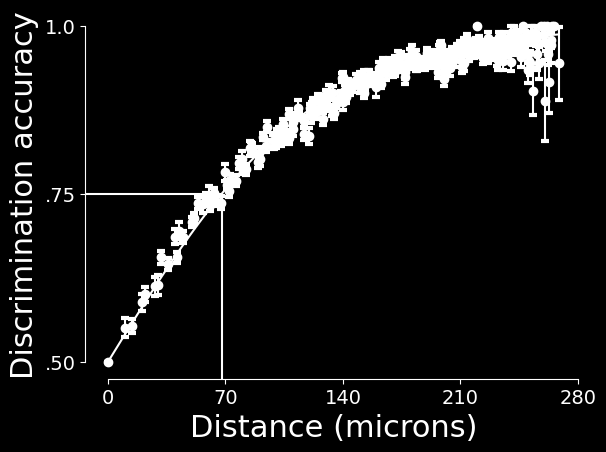

[67.16222517]


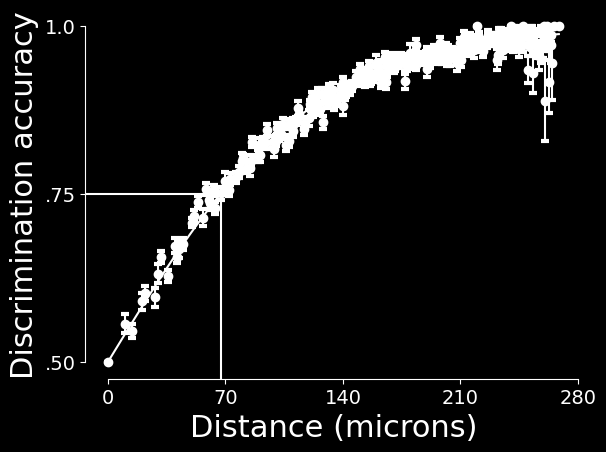

C:\Users\zfj\AppData\Local\Temp\ipykernel_8952\4243943974.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('inferno')


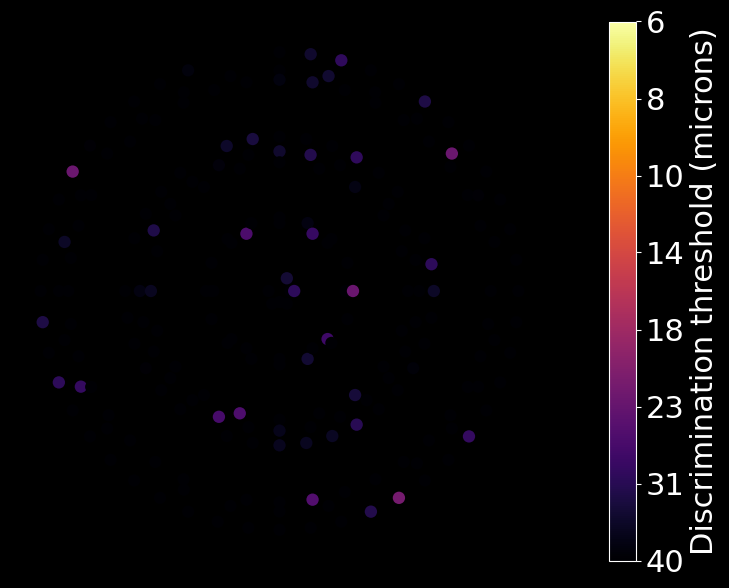

In [157]:
#matching subset
(xtrain, xtest), (ytrain, ytest) = train_test_split(psth[:,matches,:], X, Y)


mod, _ = train_network((xtrain, xtest), (ytrain, ytest))

u = np.unique(ytest, axis=0)

ptest = mod.predict(xtest)

f=10
ystest = (ytest//f + .5)*f

print(get_thresh(ystest, ptest, do_plotting=True))
plt.show()

pstest, th_s = remove_noise_correlations(xtest, ystest, nt)
print(th_s)
plt.show()

m_th_map = get_th_map(ystest, ptest)
m_th_s_map = get_th_map(ystest, pstest)

plot_th_map(ytest, a_th_map, clim=(6,40))

y_het, p_het = ystest, ptest



C:\Users\zfj\AppData\Local\Temp\ipykernel_8952\796619201.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('inferno')


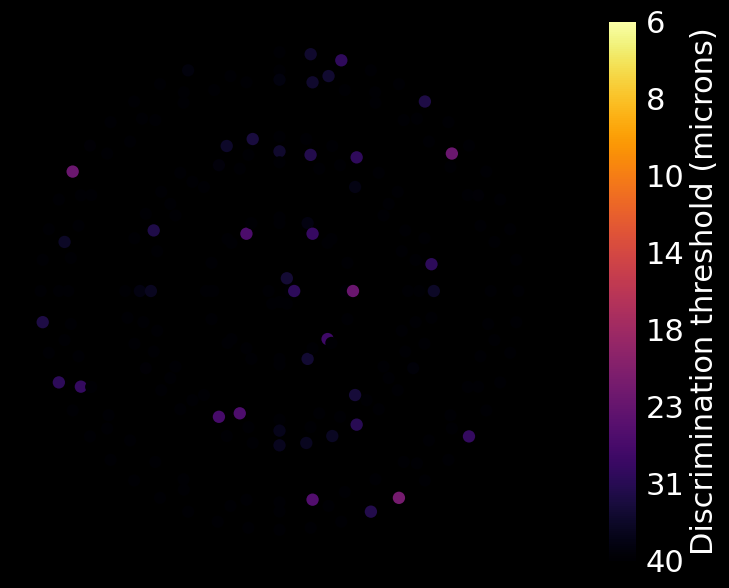

In [493]:
plot_th_map(ytest, a_th_map, clim=(6,40))

plt.savefig(r"C:\Users\zfj\Downloads\Fig6B_heterogeneous.svg", transparent=True)

In [ ]:
plt.co

C:\Users\zfj\AppData\Local\Temp\ipykernel_8952\687064483.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('inferno')


[67.71014389]
[42.63516446]
[16.63327625]
[<matplotlib.lines.Line2D object at 0x0000022922B527F0>, <matplotlib.lines.Line2D object at 0x000002292224F8E0>, <matplotlib.lines.Line2D object at 0x00000229177B3760>]


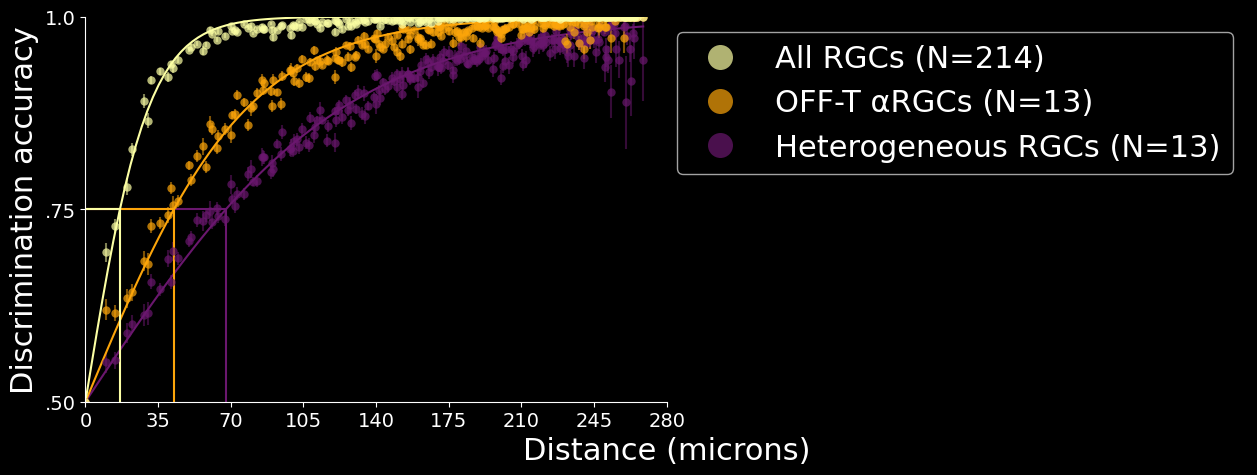

In [507]:

cmap = mpl.cm.get_cmap('inferno')
norm = mpl.colors.Normalize(vmin=0, vmax=1)
sm = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
a,b,c = sm.to_rgba([.3, .8, 1.0])
# a,b,c = "#999999", "#cccccc", "#ffffff"

plt.figure(figsize=(15,5))

plt.xlim(0, 280*2)
plt.ylim([0.5, 1.0])
print(get_thresh(y_het, p_het, do_plotting=True, c=a[:-1]))

plt.xlim(0, 280*2)
plt.ylim([0.5, 1.0])
print(get_thresh(y_off, p_off, do_plotting=True, c=b[:-1]))

plt.xlim(0, 280*2)
plt.ylim([0.5, 1.0])
print(get_thresh(y_all, p_all, do_plotting=True, c=c[:-1]))

plt.xlim(0, 280*2)
plt.ylim([0.5, 1.0])

plt.xticks([0, 35, 70, 105, 140, 175, 210, 245, 280])

k = [] 
for child in plt.gca().get_children():
    if isinstance(child, matplotlib.lines.Line2D):
        if 'o' in child.get_marker() and child.get_marker() != 'None': # scatter
            # print(child.get_marker())
            child.set_alpha(0.7)
            child.set_markeredgecolor('none')
            k.append(child)
        else: # error bar caps
            # child.set_alpha(1.0)
            child.set_markeredgecolor('none')

    elif isinstance(child,matplotlib.collections.LineCollection):
        if len(child.get_paths()) > 1: # error bar lines
            child.set_alpha(0.5)
        else:
            child.set_alpha(1.0)
    else:
        pass
print(k)


plt.legend(handles=reversed(k), labels=['All RGCs (N=214)', 'OFF-T αRGCs (N=13)', 'Heterogeneous RGCs (N=13)'], markerscale=3,)
plt.savefig(r"C:\Users\zfj\Downloads\Fig6B0.svg", transparent=True)

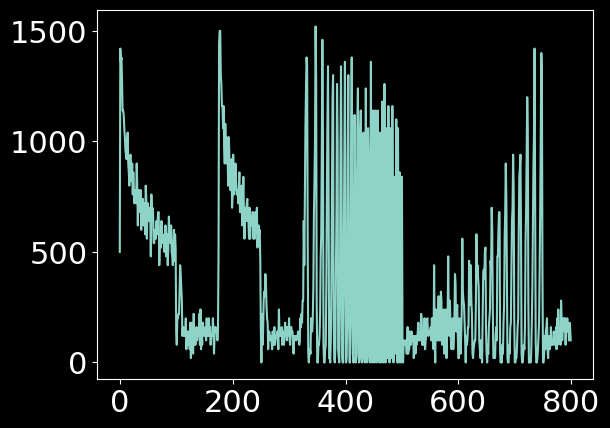

In [255]:
chr = np.array(list(chirps.keys()))
# ch_i = [np.argwhere(chr == i)[0][0] for i in [321,453,526,585,607,637,652,684,691,700,715,726,791]]
chirps[321]['psth'].shape

plt.plot(chirps[652]['psth'])



5


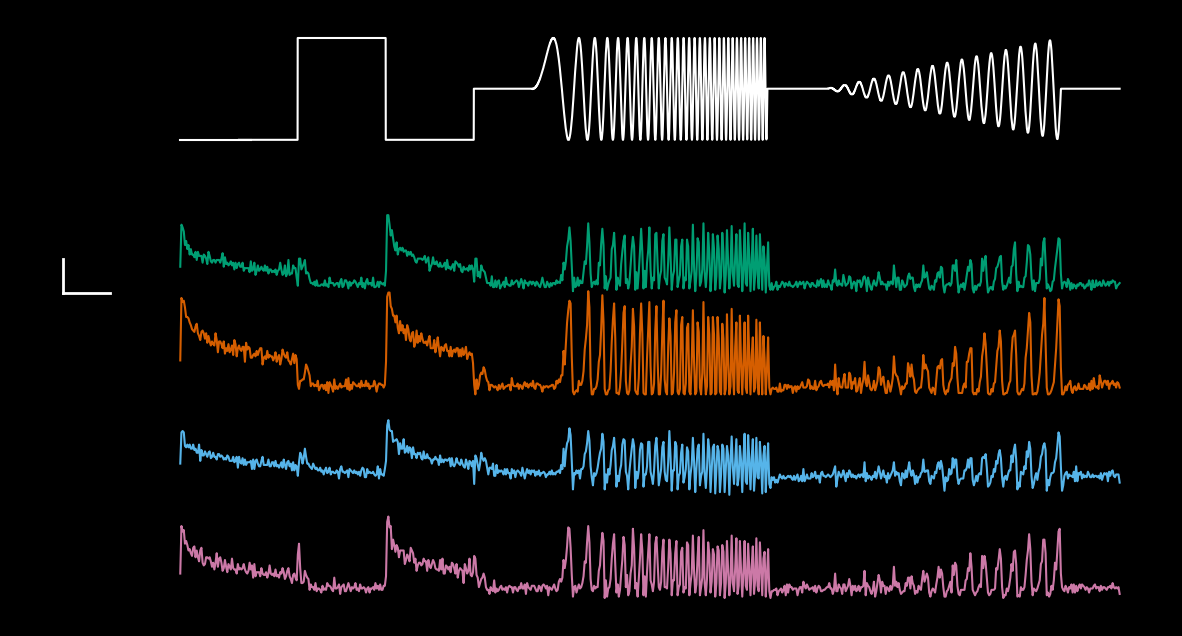

In [487]:
green, red, blue, magenta = [0, 158, 115], [213, 94, 0], [86, 180, 233], [204, 121, 167]
colors = [[c[0]/255, c[1]/255, c[2]/255, 1] for c in (green, red, blue, magenta)]


plt.figure(figsize=(15,8))

print(len(chirps[652]))


duration = 40 #seconds
nbins = 800
# cell_index = 652

#####
ti = np.linspace(0,duration, nbins)
scale = 1/300


for i,c in enumerate([637, 652, 691,715]):
    bin_factor = nbins/duration
    psth = np.bincount((np.concatenate(chirps[c]['spike_trains'])*bin_factor).astype(int), 
                    minlength=nbins) / len(chirps[c]) * bin_factor
    plt.plot(ti,psth * scale - i, c=colors[i])

###
def chirp_pattern(intensity, sf = 60):
   sf = int(sf)
   chirp = np.concatenate((
        np.zeros(2*sf), #pre time
        np.ones(3*sf), #positive step
        np.zeros(3*sf), #negative time
        np.ones(2*sf) * 0.5, #inter time
        
        -np.sin(2*np.pi*np.linspace(0,8/sf,sf*8).cumsum() + np.pi)/2 + .5, # freq chirp

        np.ones(2*sf) * 0.5, #inter time
        -np.linspace(0,1,sf*8)*np.sin(2*np.pi*2*np.arange(1/sf, 8+(1/sf), 1/sf) + np.pi)/2 + .5, # amp chirp
      

        np.ones(2*sf) * 0.5, #inter time
        np.zeros(5*sf), #tail time
   )) 

   return np.round(chirp * 255 * intensity).astype(np.uint8)#.astype(float) / (255 * intensity)


cp = chirp_pattern(1,sf = 240)
tic = np.linspace(2.5, 46.25, len(cp))
plt.plot(tic[tic<40], cp[tic<40] / cp.max() + 1.5, c='w')
plt.plot([0,3], [1.5, 1.5], c='w')


plt.plot([-5, -5], [0, 100 * scale], c='w', linewidth=2) # 100Hz
plt.plot([-5, -3], [0, 0], c='w', linewidth=2) # 2 sec


#####
# plt.xticks([5, 9, 13, 15])
# plt.vlines([5, 8.75, 12.5, 15, 25, 27.5, 37.5, 40], -3, 1)

# plt.xlabel('Time (sec)')
# plt.ylabel('Firing rate (Hz)')
plt.axis('off')



plt.savefig(r"C:\Users\zfj\Downloads\Fig6A2.svg", transparent=True)



37.0 3.141592653589793
84.0 -0.6981317007977322
130.0 1.0471975511965976
130.0 -0.654498469497874


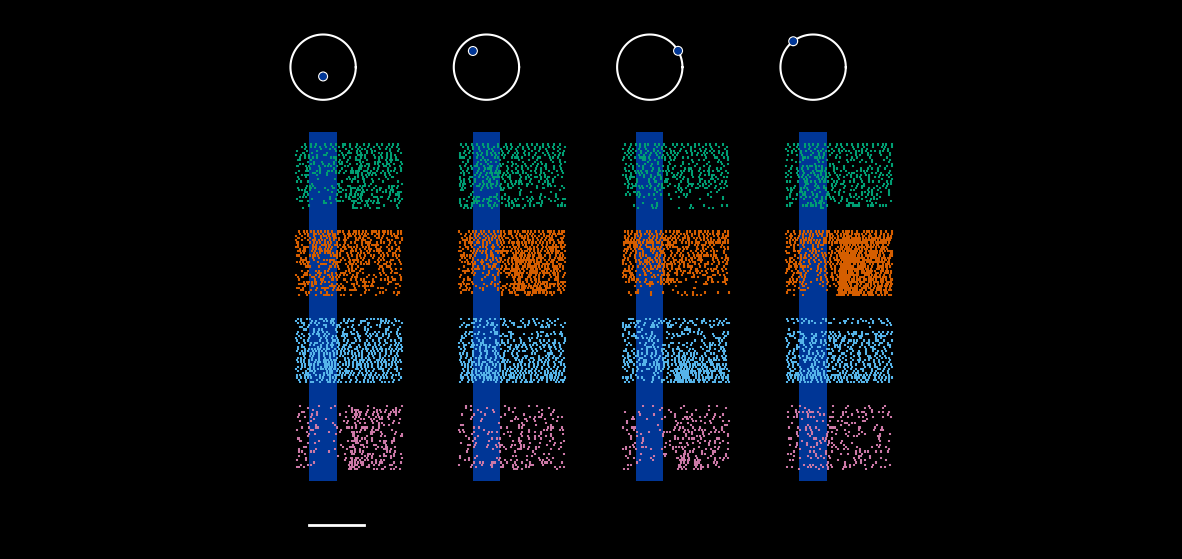

In [490]:

plt.figure(figsize=(15,7))
stimc = "#0052e2aa"

# si = [1, 100, 190, 220] # looks good
si = [20, 120, 200, 235] 




vscale = 1/50


k = 0
# x,y= np.array([-.25, .5, .5, -.25, -.25]), np.array([160, 160, 220, 220, 160])
th = np.linspace(0,2*np.pi,100)
r = 15 * vscale
vo = 185 * vscale
x,y = r*np.cos(th) + .125, r*np.sin(th) + vo

R = X.max()

for s in range(4):
    plt.fill_between([0+s*1.5, .25 + s*1.5], -5*vscale, 155*vscale, edgecolor='none', facecolor=stimc)

    plt.plot(x + 1.5*s, y, c='w')

    thi,ri = np.arctan2(Y[si[s]], X[si[s]]), np.sqrt(X[si[s]]**2 + Y[si[s]]**2)
    print(ri, thi)

    # plt.scatter(.125 + 1.5*s + ri/R*r*np.cos(thi), vo + ri/R*r*np.sin(thi), c=stimc)

    # xyi = (.125 + 1.5*s + ri/R*r*np.cos(thi), vo + ri/R*r*np.sin(thi))
    xyi = (.125 + 1.5*s + ri/R*r*np.sin(thi), vo + ri/R*r*np.cos(thi))

    ec = EllipseCollection(40/R*r,40/R*r,0,units='xy',facecolor='w', offsets=xyi, offset_transform=plt.gca().transData, zorder=100)
    plt.gca().add_collection(ec)    
    ec = EllipseCollection(30/R*r,30/R*r,0,units='xy',facecolor='k', offsets=xyi, offset_transform=plt.gca().transData, zorder=101)
    plt.gca().add_collection(ec)    
    ec = EllipseCollection(30/R*r,30/R*r,0,units='xy',facecolor=stimc, offsets=xyi, offset_transform=plt.gca().transData, zorder=102)
    plt.gca().add_collection(ec)

    
    # plt.plot(.125 + np.cos(th))



#not: 453, 700, 526,585, 607
#637, 652, 715, maybe 691
# [321,453,526,585,607,637,652,684,691,700,715,726,791]
for i,c in enumerate(reversed([637, 652, 691,715])):
    for s in range(4):
        j = k
        for st in d[c][si[s]]['spike_trains']:
            plt.vlines(st + s*1.5, j*vscale, (j+1) * vscale, color=colors[3-i])
            j+=1
        
    k= j + 10
# d[684][0]['spike_trains']

plt.plot([0, .5], [-.5, -.5], c='w', linewidth=2) #0.5 sec
# plt.plot([-1, -.5], [1.5, 1.5], c='w', linewidth=2)


plt.axis('off')
plt.axis('equal')


plt.savefig(r"C:\Users\zfj\Downloads\Fig6A3.svg", transparent=True)


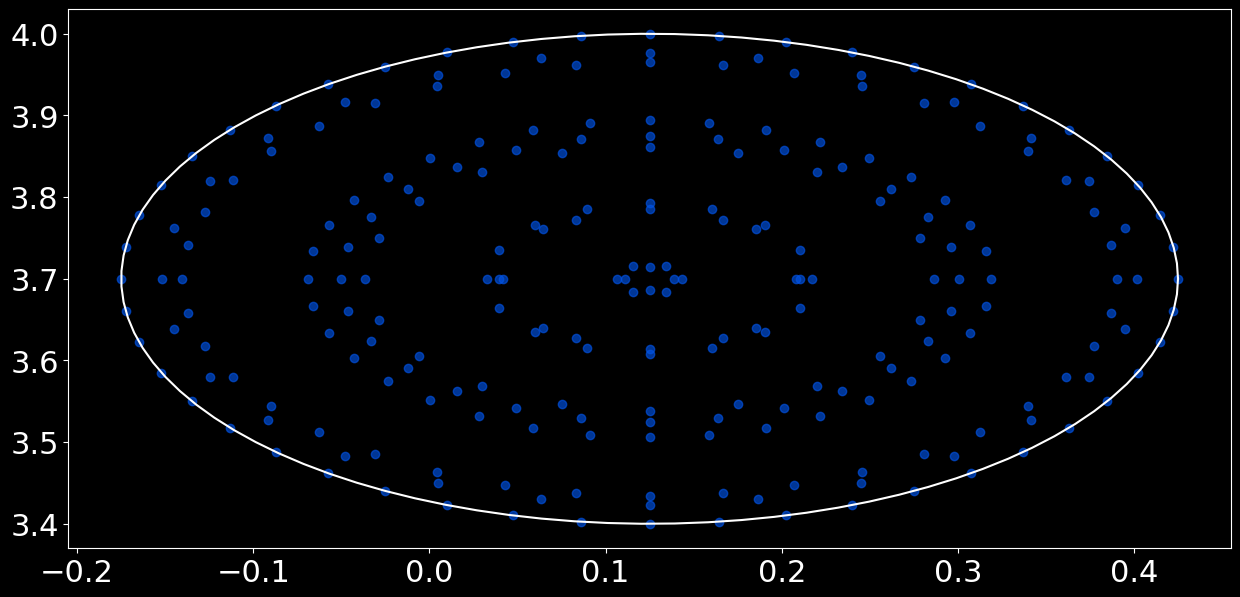

In [446]:

plt.figure(figsize=(15,7))
stimc = "#0052e2aa"

si = [1, 100, 170, 239]



vscale = 1/50


k = 0
# x,y= np.array([-.25, .5, .5, -.25, -.25]), np.array([160, 160, 220, 220, 160])
th = np.linspace(0,2*np.pi,100)
r = 15 * vscale
vo = 185 * vscale
x,y = r*np.cos(th) + .125, r*np.sin(th) + vo

R = X.max()

plt.plot(x, y, c='w')

for s in range(240):
    thi,ri = np.arctan2(Y[s], X[s]), np.sqrt(X[s]**2 + Y[s]**2)
    # print(ri, thi)

    plt.scatter(.125+ ri/R*r*np.cos(thi), vo + ri/R*r*np.sin(thi), c=stimc)
